This notebook is used to support a lecture on entropy, which closely follows the exposition from Schroeder's Introduction to Thermal Physics.

# Two state system


+ In a system of $N$ particles, each one being able to have two states (*heads* or *tails*, or more realistically, *spin up* or *spin down*), the multiplicity of a macrostate defined by $n$ particles in the same state (e.g. *heads* or *spin up*) is given by:

$$\Omega(N,n) = \begin{pmatrix} N \\ n\end{pmatrix}=\frac{N!}{n!\left(N-m\right)!}$$

In [232]:
import math
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

def two_state_Omega(N,n):
    # use only with relatively small number N
    assert isinstance(N, int)
    assert isinstance(n, int)
    Omega = math.factorial(N) / math.factorial(n) / math.factorial(N-n)
    return int(Omega)

def two_state_table(N):
    macros    = [x for x in range(N+1)]
    Omegas    = [two_state_Omega(N,x) for x in macros]
    Omega_all = sum(Omegas)
    Probs     = [x/Omega_all for x in Omegas]
    
    return macros, Omegas, Omega_all, Probs

def two_state_plot(N, prob=False):
    
    macros, Omegas, Omega_all, Probs = two_state_table(N)
    
    if prob:
        y       = Probs
        y_label = r"Probability"
    else:
        y       = Omegas
        y_label = r"$\Omega_{\mathrm{total}}$"
    
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(1,1,1)
    ax.bar(macros, y, color='tab:gray')
    ax.axvline(macros[0],  linestyle='--', color='tab:gray', linewidth=3)
    ax.axvline(macros[-1], linestyle='--', color='tab:gray', linewidth=3)
    ax.set_xlabel(r"Macrostate"), ax.set_ylabel(y_label)
    
    return

In [233]:
two_state_demo = interactive(two_state_plot, N=widgets.IntSlider(min=3, max=150, step=10, value=3))
output  = two_state_demo.children[-1]

two_state_demo

interactive(children=(IntSlider(value=3, description='N', max=150, min=3, step=10), Checkbox(value=False, desc…

# Einstein solid

+ Let's look at a toy model for a solid. It is a collection of harmonic oscillators (each atom would be made of 3, one for each direction of vibration). We will call the number of oscillators in the system, $N$.


+ Each oscillator can store **any** number of energy units. Energy is quantized, it comes in discrete units, or packets, each of size:

$$E = hf$$

where h is a constant, and f is the harmonic oscillator frequency (the same for all the atoms of a pure substance)

+ The total amount of energy available to the solid is fixed. That is, there is a total number of units of energy, which we will call $q$.

+ The multiplicity of a macrostate defined by $N$ oscillators and $q$ energy units is given by:

$$\Omega\left(N,q\right)=\begin{pmatrix} q+N-1 \\ q\end{pmatrix}=\frac{\left(q+N-1\right)!}{q!\left(N-1\right)!}$$

+ For very lage numbers of $N$ and $q$ it is convenient to use Stirling's approximation:

$$N!\approx N^N e^{-N}\sqrt{2\pi N} \implies \ln N! \approx N \ln N - N$$

and write:

$$\ln \Omega(N,q) \approx N \ln \frac{q}{N} + N + \frac{N^2}{q}$$

+ In the *high temperature limit*, when $q>>N$, we can further approximate the multiplicity by:

$$\Omega(N,q)\approx \left(\frac{eq}{N}\right)^N$$

## Interacting Einstein solids

+ For two Einstein solids interacting in a way that they can exchange energy, but the total energy available is fixed:

$$q = q_A + q_B$$

+ And within that constraint, we can compute the multiplicity for each solid individually, and for the set of both together:

$$\Omega_{A+B}=\Omega_A \cdot \Omega_B$$

In [225]:
def einstein_omega(N, q):
    
    omega = math.comb(N+q-1, q)
        
    return omega

def einstein_omegas(NA, NB, q):
    
    q_A = [x for x in range(q+1)]
    q_B = q_A[::-1]
    
    omegas_A = [einstein_omega(NA, x) for x in q_A]
    omegas_B = [einstein_omega(NB, x) for x in q_B]
    
    omegas = [x*y for x,y in zip(omegas_A, omegas_B)]
    
    return q_A, q_B, omegas_A, omegas_B, omegas

def einstein_omegas_plot(NA, NB, q, prob=False):
    
    q_A, q_B, omegas_A, omegas_B, omegas = einstein_omegas(NA, NB, q)
    
    if prob:
        omega_tot = sum(omegas)
        probs     = [x / omega_tot for x in omegas]
        y_label   = r"Probability"
        
    else:
        probs   = omegas
        y_label = r"$\Omega_{\mathrm{total}}$"
    
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(1,1,1)
    ax.bar(q_A, probs, color='tab:gray')
    ax.axvline(q_A[0],  linestyle='--', color='tab:gray', linewidth=3)
    ax.axvline(q_A[-1], linestyle='--', color='tab:gray', linewidth=3)
    ax.set_xlabel(r"$q_A$"), ax.set_ylabel(y_label)
    
    return

In [229]:
einstein_interact_demo = interactive(einstein_omegas_plot, 
                                     NA = widgets.IntSlider(min=3, max=300, step=10, value=3),
                                     NB = widgets.IntSlider(min=3, max=200, step=10, value=3),
                                     q  = widgets.IntSlider(min=6, max=100, step=10, value=6))
output  = einstein_interact_demo.children[-1]

einstein_interact_demo

interactive(children=(IntSlider(value=3, description='NA', max=300, min=3, step=10), IntSlider(value=3, descri…

## Large systems

+ The peak of the multiplicity distribution becomes narrower as the number of energy packets increases.

In [336]:
def einstein_omega_large(N, q):
    ln_omega = q * math.log((q+N)/q) + N * math.log((q+N)/N) - 0.5 * math.log(2*math.pi*q*(q+N)/N)
        
    return ln_omega

def einstein_omegas_large(NA, NB, q):
    
    q_A = [x for x in range(q+1)][1:]
    q_B = q_A[::-1]
    
    ln_omegas_A = [einstein_omega_large(NA, x) for x in q_A]
    ln_omegas_B = [einstein_omega_large(NB, x) for x in q_B]
    
    ln_omegas = [x+y for x,y in zip(ln_omegas_A, ln_omegas_B)]
    
    return q_A, q_B, ln_omegas_A, ln_omegas_B, ln_omegas

def einstein_omegas_large_plot(NA, NB, q, prob=False):
    
    q_A, q_B, ln_omegas_A, ln_omegas_B, ln_omegas = einstein_omegas_large(NA, NB, q)
    
    # normalize
    ln_max = max(ln_omegas)
    ys     = [x - ln_max for x in ln_omegas]
    ys     = [math.exp(x) for x in ys]
    
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(1,1,1)
    ax.bar(q_A, ys, color='tab:gray')
    ax.axvline(q_A[0],  linestyle='--', color='tab:gray', linewidth=3)
    ax.axvline(q_A[-1], linestyle='--', color='tab:gray', linewidth=3)
    ax.set_xlabel(r"$q_A$"), ax.set_ylabel(r"$\Omega_{total} / \Omega_{max}$")
    
    return

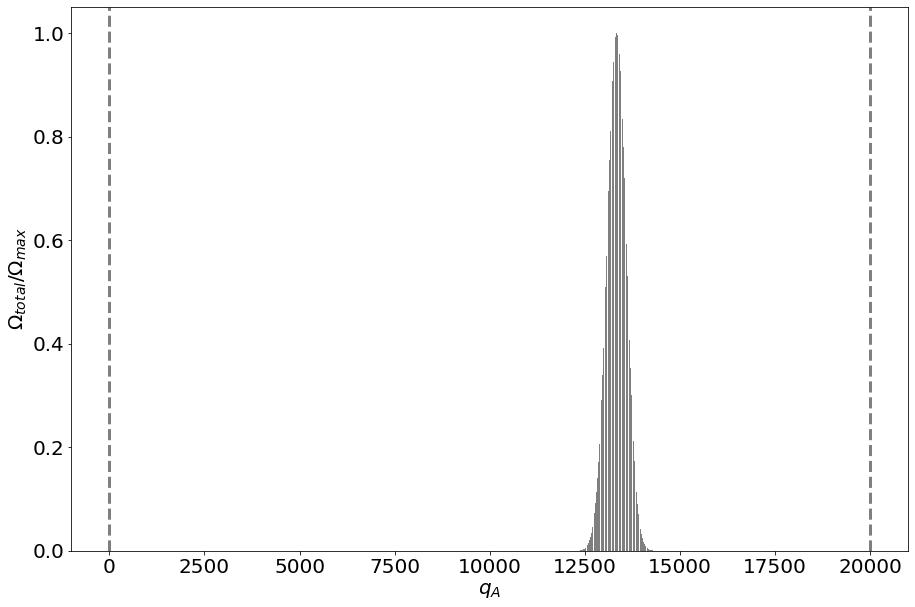

In [271]:
einstein_omegas_large_plot(NA=1000, NB=500, q=20000, prob=False)

### Entropy:

+ We define the entropy of a system as 

$$S = k_B \ln \Omega$$

In [275]:
def entropy(omega):
    k_b = 1.38e-23
    return k_b * math.log(omega)

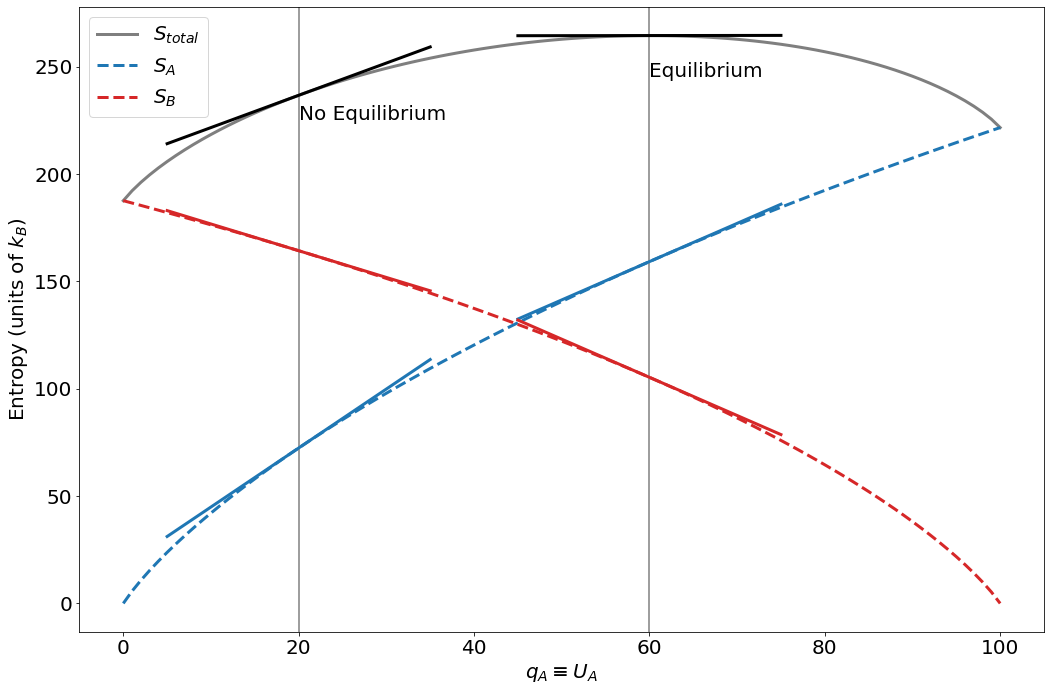

In [335]:
# Let's illustrate the equilibrium of two systems
q_A, q_B, omegas_A, omegas_B, omegas = einstein_omegas(NA=300, NB=200, q=100)

# Normalized entropy: 
k_b = 1.38e-23
S_A = [entropy(x)/k_b for x in omegas_A]
S_B = [entropy(x)/k_b for x in omegas_B]
S   = [entropy(x)/k_b for x in omegas]

# Find interesting magnitudes
delta_index = 15

# Maximum point analysis
S_max            = max(S)
max_index        = S.index(S_max)
q_max_1, q_max_2 = q_A[max_index-delta_index], q_A[max_index+delta_index]
slope_max        = (S[max_index+1]-S[max_index-1]) / (q_A[max_index+1]-q_A[max_index-1])
S_max_1, S_max_2 = S_max - 0.5*slope_max * (q_max_2-q_max_1), S_max + 0.5*slope_max * (q_max_2-q_max_1)

slope_max_A          = (S_A[max_index+1]-S_A[max_index-1]) / (q_A[max_index+1]-q_A[max_index-1])
S_max_A_1, S_max_A_2 = S_A[max_index] - 0.5*slope_max_A * (q_max_2-q_max_1), S_A[max_index] + 0.5*slope_max_A * (q_max_2-q_max_1)

slope_max_B          = (S_B[max_index+1]-S_B[max_index-1]) / (q_A[max_index+1]-q_A[max_index-1])
S_max_B_1, S_max_B_2 = S_B[max_index] - 0.5*slope_max_B * (q_max_2-q_max_1), S_B[max_index] + 0.5*slope_max_B * (q_max_2-q_max_1)

low = 20
q_low_1, q_low_2 = q_A[low-delta_index], q_A[low+delta_index]
slope_low        = (S[low+1]-S[low-1]) / (q_A[low+1]-q_A[low-1])
S_low_1, S_low_2 = S[low] - 0.5*slope_low * (q_low_2-q_low_1), S[low] + 0.5*slope_low * (q_low_2-q_low_1)

slope_low_A          = (S_A[low+1]-S_A[low-1]) / (q_A[low+1]-q_A[low-1])
S_low_A_1, S_low_A_2 = S_A[low] - 0.5*slope_low_A * (q_low_2-q_low_1), S_A[low] + 0.5*slope_low_A * (q_low_2-q_low_1)

slope_low_B          = (S_B[low+1]-S_B[low-1]) / (q_A[low+1]-q_A[low-1])
S_low_B_1, S_low_B_2 = S_B[low] - 0.5*slope_low_B * (q_low_2-q_low_1), S_B[low] + 0.5*slope_low_B * (q_low_2-q_low_1)


fig = plt.figure(figsize=(15,10))
ax  = fig.add_subplot(1,1,1)

ax.plot(q_A, S,   linestyle='-',  color='tab:gray', linewidth=3, label=r"$S_{total}$")
ax.plot(q_A, S_A, linestyle='--', color='tab:blue', linewidth=3, label=r"$S_A$")
ax.plot(q_A, S_B, linestyle='--', color='tab:red',  linewidth=3, label=r"$S_B$")

ax.axvline(q_A[max_index], color='tab:grey')
ax.plot([q_max_1, q_max_2], [S_max_1, S_max_2],     c='k', linewidth=3)
ax.plot([q_max_1, q_max_2], [S_max_A_1, S_max_A_2], c='tab:blue', linewidth=3)
ax.plot([q_max_1, q_max_2], [S_max_B_1, S_max_B_2], c='tab:red', linewidth=3)

ax.axvline(q_A[low], color='tab:grey')
ax.plot([q_low_1, q_low_2], [S_low_1, S_low_2],     c='k',        linewidth=3)
ax.plot([q_low_1, q_low_2], [S_low_A_1, S_low_A_2], c='tab:blue', linewidth=3)
ax.plot([q_low_1, q_low_2], [S_low_B_1, S_low_B_2], c='tab:red',  linewidth=3)

ax.text(60, 245, r"Equilibrium")
ax.text(20, 225, r"No Equilibrium")



ax.legend()
ax.set_xlabel(r"$q_A\equiv U_A$"), ax.set_ylabel(r"Entropy (units of $k_B$)")
plt.tight_layout()